<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/class-activity/Class_Activity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
df = pd.read_csv('synthetic_dataset.csv')
df.insert(0,"x0",[1 for i in range(50)])
df.head

<bound method NDFrame.head of     x0        x1        x2  y
0    1 -4.641770  5.558556  1
1    1  7.139793  6.571105  1
2    1  4.127969 -9.024912 -1
3    1  0.081377  3.861381  1
4    1 -1.253937  8.009625  1
5    1  0.691457 -7.475995 -1
6    1  0.652163 -3.871063 -1
7    1  5.136417  1.113326  1
8    1  1.107815  4.554135  1
9    1  1.543556 -2.519626  1
10   1 -4.779720 -0.630814 -1
11   1  3.858113 -7.419825 -1
12   1 -8.583122  4.002171 -1
13   1  9.569902  2.528168  1
14   1 -2.209894 -9.980375 -1
15   1  4.899275  7.742115  1
16   1 -0.203597 -5.380567 -1
17   1  5.575367  3.495771  1
18   1 -3.662493  1.406601 -1
19   1 -9.251072 -8.367551 -1
20   1  6.907998 -1.895983  1
21   1 -2.368033  2.337284  1
22   1  3.287761  5.682772  1
23   1  8.573629  4.714370  1
24   1 -6.391904 -3.394939 -1
25   1 -9.484470 -2.671820 -1
26   1 -0.447425 -3.710735 -1
27   1  5.781484 -6.310988  1
28   1 -6.008654 -4.243973 -1
29   1  7.627841  9.697011  1
30   1 -4.004916  7.633855  1
31   1 -0.

<Axes: xlabel='x1', ylabel='x2'>

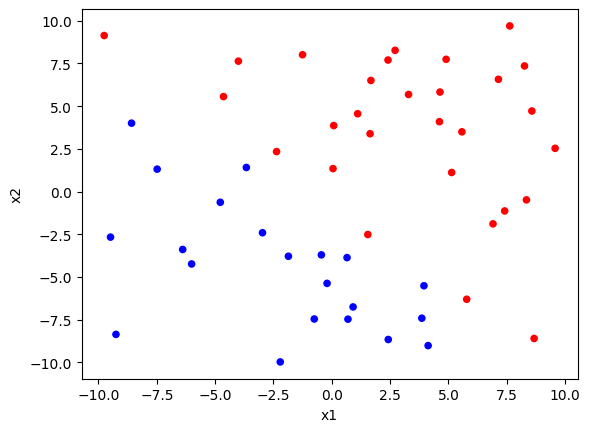

In [3]:
df["color"] = np.where(df["y"]==1, "red", "blue")
df.plot.scatter(x="x1", y="x2", color=df["color"])

In [4]:
def sign(x):
  if(x>=0):
    return 1
  else:
    return -1

In [5]:
def get_sign(x, w):
  dot_product = (x[0]*w[0] + x[1]*w[1] + x[2]*w[2])
  return sign(dot_product)

In [6]:
df_y = df["y"]

def check_for_misclassified(w):
  # print("new weight: " , w);
  misclassified = {}
  # print("before:",misclassified)
  classified_on_current_w_line = []
  for i in range (df.shape[0]):
    classified_on_current_w_line.append(get_sign(df.iloc[i],w))

    if(classified_on_current_w_line[i]!=df_y[i]):
        misclassified[i] = classified_on_current_w_line[i]

  # print(classified_on_current_w_line)
  # print("after:",misclassified)
  return misclassified

In [7]:
def plot_graph(i, w):
  col = df['y'].map({-1:'b', 1:'r'})
  df.plot.scatter(x='x1', y='x2', c=col)
  axes = plt.gca()
  plt.xticks(range(-11,11))
  plt.yticks(range(-11,11))

  x_vals = np.array(axes.get_xlim())
  y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
  plt.plot(x_vals, y_vals, '--')

def perceptron():
  w = [0,0,0]
  misclassified = check_for_misclassified(w)
  #print(misclassified)
  i=0

  while(len(misclassified)!=0 and i<100):

    list_of_misclass = list(misclassified.keys())[0]
    x0 = df.iloc[list_of_misclass][0]
    x1 = df.iloc[list_of_misclass][1]
    x2 = df.iloc[list_of_misclass][2]
    y = df.iloc[list_of_misclass][3]

    w[0] = w[0] + x0*y
    w[1] = w[1] + x1*y
    w[2] = w[2] + x2*y

    misclassified = check_for_misclassified(w)
    i=i+1
  print("PLA")
  print("This is how many iterations it takes:",i)
  print("This is the final weight: ",w)
  plot_graph(i, w)
  #return w

PLA
This is how many iterations it takes: 18
This is the final weight:  [12, 8.60155808, 8.976392324000004]


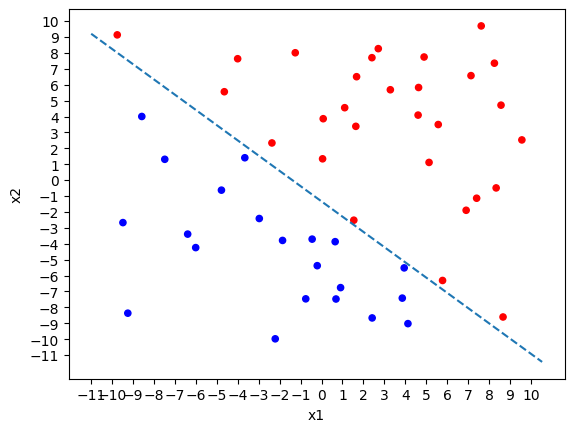

In [8]:
w = perceptron()

In [9]:
import copy
import random

def pocketAlgo():
  w_pocket = [0,0,0]
  misclassified = check_for_misclassified(w_pocket)
  w_maybeNew = [0,0,0]
  w_pocket_size = len(misclassified)

  i=0
  while(len(misclassified)!=0 and i<100):
    # list_of_misclass = random.choice(list(misclassified.keys()))
    list_of_misclass = list(misclassified.keys())[0]
    x0 = df.iloc[list_of_misclass][0]
    x1 = df.iloc[list_of_misclass][1]
    x2 = df.iloc[list_of_misclass][2]
    y = df.iloc[list_of_misclass][3]

    # print(x0,x1,x2,y)

    w_maybeNew[0] = w_pocket[0] + x0*y
    w_maybeNew[1] = w_pocket[1] + x1*y
    w_maybeNew[2] = w_pocket[2] + x2*y

    # w_maybeNew[0] = w_maybeNew[0] + x0*y
    # w_maybeNew[1] = w_maybeNew[1] + x1*y
    # w_maybeNew[2] = w_maybeNew[2] + x2*y
    #print(w_maybeNew)

    misclassified_new = check_for_misclassified(w_maybeNew)
    size_of_misclassified_new = len(misclassified_new)
    #print(w_maybeNew, w_maybeNew.copy())
    #print(w_pocket, w_pocket_size, w_maybeNew, size_of_misclassified_new)
    if size_of_misclassified_new <= w_pocket_size:
      w_pocket = w_maybeNew.copy()
      w_pocket_size = size_of_misclassified_new
    #print(w_pocket, w_pocket_size, w_maybeNew, size_of_misclassified_new, list_of_misclass)

    misclassified = check_for_misclassified(w_pocket)
    i=i+1
    #print(w_pocket)

  print("Pocket")
  print("This is how many iterations it takes:",i)
  print("This is the final weight: ",w_pocket)

  plot_graph(i, w_pocket)

Pocket
This is how many iterations it takes: 100
This is the final weight:  [2, 4.095560479, 5.098986795]


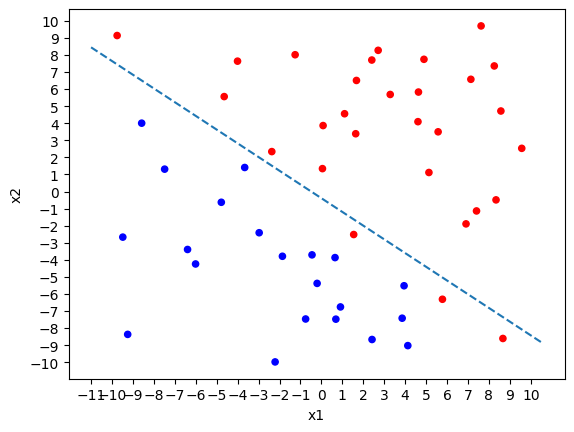

In [10]:
pocketAlgo()